# Soal 2 - Majalah Trend Motor US

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
cars = pd.read_csv('dataset/mtcars - Data.csv')

In [3]:
# look data
cars.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# Dataset statistical info and columns info
cars.info()
cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Cars    32 non-null object
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
# fungsi untuk memberikan nilai untuk kolom mpg_level berdasarkan nilai pada kolom mpg
def mpg_level(row):
    if row['mpg'] < 20:
        val = 'low'
    elif row['mpg'] >= 20 and row['mpg'] <= 30:
        val = 'medium'
    elif row['mpg'] > 30:
        val = 'hard'
    return val

In [6]:
# Kolom mpg_level mengapply fungsi yang sudah dibuat untuk setiap barisnya
cars['mpg_level'] =cars.apply(mpg_level, axis=1)

In [7]:
# Melihat dataframe yang terbaru setelah ditambahkan kolom mpg_level beserta nilainya
cars.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,medium
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,medium
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,medium
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,medium
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,low


## Exploratory Data Analysis

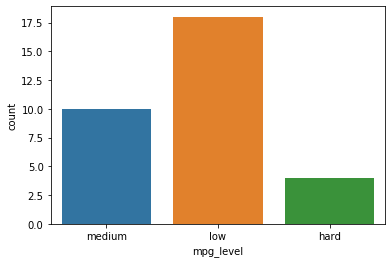

In [8]:
# Melihat jumlah miles per galon level dari mobil-mobil
sns.countplot(x='mpg_level', data=cars)

Terlihat dari histogram atau countplot di atas tentang variasi dari jumlah miles per galon level mobil-mobil. Low mpg_level adalah dengan jumlah terbanyak yaitu 18 mobil dari 32 mobil yang ada, diikuti dengan level medium 10 mobil, dan level hard dengan 3 mobil

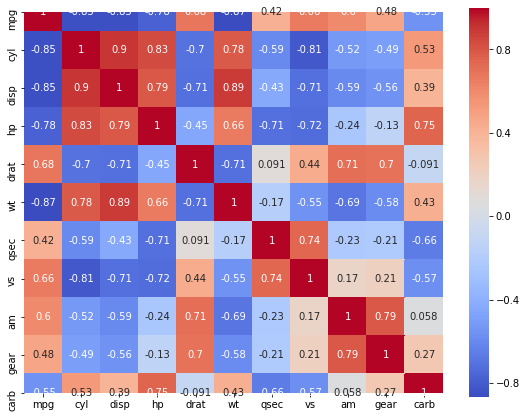

In [9]:
# Mengetahui hubungan antara setiap fitur/kolom dari dataset
cars_corr = cars.corr()
fig, ax = plt.subplots(figsize=(8,6))
plt.tight_layout()
sns.heatmap(ax=ax, data=cars_corr, annot=True, fmt='.2g', cmap= 'coolwarm',square=True)

Tujuan dibuat heatmap di atas adalah untuk melihat visualisasi dari korelasi atau hubungan setiap fitur dataset mtcars yang sudah dihitung menggunakan fungsi corr(). 
Terlihat bahwa nilai korelasi yang bernilai negatif, positif, dan terkadang ada yang mendekati 0.

Korelasi yang bernilai positif bermakna kedua fitur/kolom tersebut memiliki hubungan linear garis bergradien positif. Artinya adalah semakin besar nilai suatu data di satu fitur, semakin besar pula nilai data tersebut di fitur yang lain. Semakin besar angka korelasi positif, semakin kuatlah hubungan antara kedua fitur.
Contohnya adalah Fitur/kolom cyl "Cylinder" dan kolom disp "Displacement". Semakin banyaknya jumlah silinder pada sebuah mobil, semakin besar pula displacement yang dimiliki mobil tersebut.

Korelasi yang bernilai negatif bermakna kedua fitur/kolom tersebut memiliki hubungan linear garis bergradien negatif, yaitu hubungan yang bertolak belakang. Artinya adalah semakin besar nilai suatu data di satu fitur, nilai data tersebut di fitur yang lain semakin kecil. Semakin negatif nilai korelasi, semakin bertolakbelakang hubungan antara kedua fitur.
Contohnya adalah fitur/kolom mpg "Miles per gallon" dan kolom hp "Horse power". Kedua fitur tersebut memiliki hubungan yaitu semakin besarnya horsepower yang dimiliki oleh sebuah mobil, jauhnya jarak yang ditempuh per gallonnya semakin kecil. Dengan kata lain, mobil dengan horsepower yang kecil cenderung lebih hemat bahan bakar dan memiliki jangkauan yang lebih jauh dibandingkan dengan mobil dengan horsepower besar.

Korelasi yang bernilai 0 atau mendekati 0 bermakna tidak adanya hubungan antara kedua fitur/kolom tersebut atau kedua fitur memiliki hubungan yang sangat kecil dan bisa dianggap tidak berhubungan.

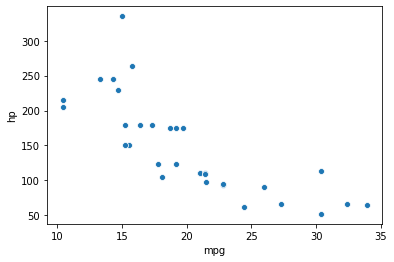

In [10]:
# Scatterplot untuk melihat sebaran data dari kolom mpg "miles per gallon" dan hp "horse power"
sns.scatterplot(x='mpg', y='hp', data=cars)

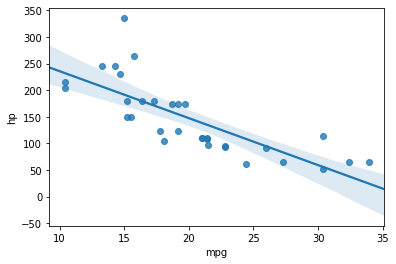

In [11]:
# Scatterplot dari kolom mpg dan hp yang divisualisasi dengan tambahan garis regresi linear menggunakan regplot
sns.regplot(x='mpg', y='hp', data=cars)

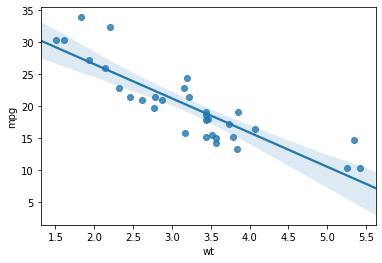

In [12]:
# Regplot berupa scatterplot + garis regresi linear dari fitur wt "weight" dan mpg "miles per gallon"
sns.regplot(x='wt', y='mpg', data=cars)

dari regplot di atas, diketahui bahwa Semakin beratnya suatu mobil, semakin kecil pula jangkauan dari mobil tersebut per gallonnya.

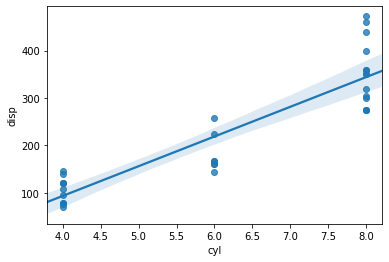

In [13]:
sns.regplot(x='cyl', y='disp', data=cars)

Dari regplot di atas, terlihat bahwa mobil yang memiliki silinder lebih sedikit cenderung memiliki displacement yang lebih kecil dibandingkan dengan mobil yang memiliki silinder lebih banyak

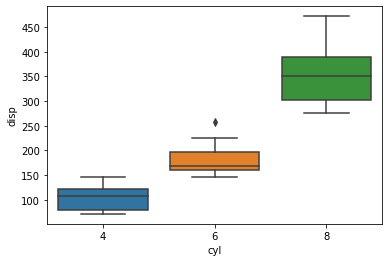

In [14]:
sns.boxplot(x='cyl', y='disp', data=cars)

Boxplot di atas merepresentasikan sebaran nilai displacement mobil berdasarkan jumlah silinder yang dimiliki. Boxplotnya terlihat bagus karena kedua fitur/kolom tersebut memiliki hubungan korelasi yang positif.
Terdapat pencilan/outlier pada boxplot silinder 6

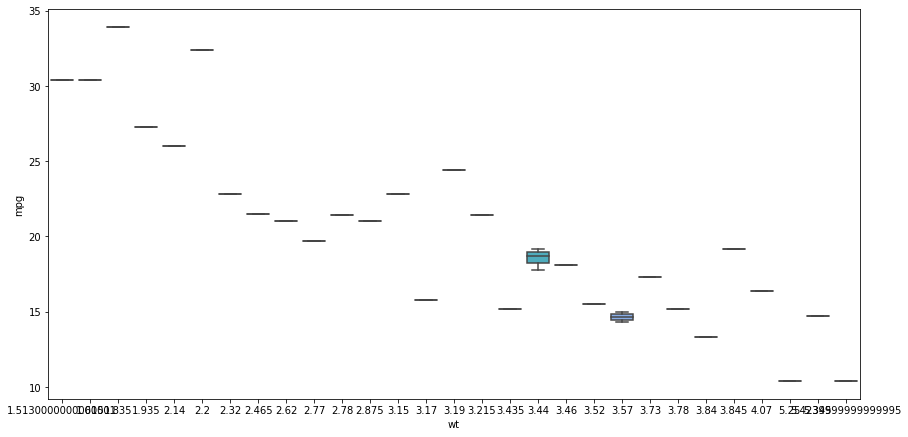

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
plt.tight_layout()
sns.boxplot(ax=ax, x='wt', y='mpg', data=cars)

Ketika sebaran data yang memiliki koefisien negatif dan tidak berkelompok seperti yang terjadi pada hubungan silinder dan displacement, boxplot yang ditampilkan akan terlihat aneh sekali seperti pada gambar plot di atas. Hanya 2 boxplot yang terlihat pada data tersebut yang memiliki bentuk.

In [16]:
# Crosstab

Crosstab bisa dibuat menggunakan pandas crosstab -> pd.crosstab
Tetapi saya belum begitu paham bagaimana cara menentukan kolom terbaik untuk dijadikan crosstab atau argumen yang harus digunakan dalam menentukan crosstabulation terbaik dari dataframe cars ini

Saya masih memerlukan bimbingan dari senior data science dan analyst untuk membimbing saya menjadi junior data scientist yang lebih baik